# OpenAIのAPIを使ってみる

---

# このNotenbookの内容

- API
- OpenAIのAPI
- （時間があれば：別ファイル）flaskライブラリでAPIアクセスポイントを作ってみる

***
# API

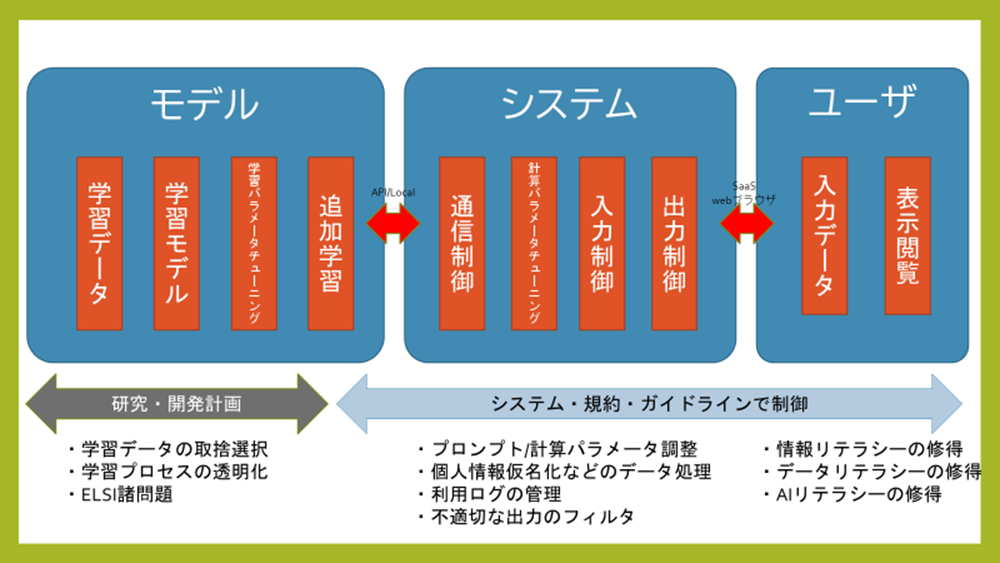

- Wikipedia - API  
[https://ja.wikipedia.org/wiki/アプリケーションプログラミングインターフェイス](https://ja.wikipedia.org/wiki/%E3%82%A2%E3%83%97%E3%83%AA%E3%82%B1%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%82%A4%E3%83%B3%E3%82%BF%E3%83%95%E3%82%A7%E3%83%BC%E3%82%B9)

***
# OpenAIのAPIを使ってみる

## 公式ドキュメント

- OpenAI developer platform  
[https://platform.openai.com/docs/overview](https://platform.openai.com/docs/overview?lang=python)

In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.responses.create(
    model="gpt-4o-mini",
    input="Write a short bedtime story about a unicorn."
)

print(response.output_text)

⚠️ エラーを読みましょう。  
次のコードの実行前に、資料配布サイトから`config.py`をアップロードしてください。

In [ ]:
from openai import OpenAI
from myconfig import config
config().set()
client = OpenAI()

response = client.responses.create(
    model="gpt-4o-mini",
    input="Write a short bedtime story about a unicorn."
)

print(response.output_text)

`response`にはAPIからの応答が格納されています。

In [ ]:
# responseの表示
print(response)

***
### OpenAI APIで用意されているモデル
- OpenAI developer platform - Models  
  [https://platform.openai.com/docs/models](https://platform.openai.com/docs/models)


### Image generation

- Document  
  [https://platform.openai.com/docs/guides/image-generation](https://platform.openai.com/docs/guides/image-generation?image-generation-model=dall-e-3)
- API reference  
  [https://platform.openai.com/docs/api-reference/images](https://platform.openai.com/docs/api-reference/images)


**DALL·E 3** を使用します

画像生成のAPIシステム上限が5件/分なので、エラーが返ってきたらしばらく待ってから再実行してください。


In [ ]:
# 連打禁止
import base64
from io import BytesIO
from PIL import Image

result = client.images.generate(
    model="dall-e-3",
    prompt="新潟大学院生会の栄光ある美しい紋章、雪華、海の幸。", # ここにプロンプトを入力
    size="1024x1024",
    response_format="b64_json" # APIの画像エンコード形式
)

b64_data = result.data[0].b64_json # エンコード文字列の取得
image_bytes = base64.b64decode(b64_data) # Base64 をデコードしてバイト列に
image = Image.open(BytesIO(image_bytes)) # Pillow で画像オブジェクトに変換

display(image) # 表示

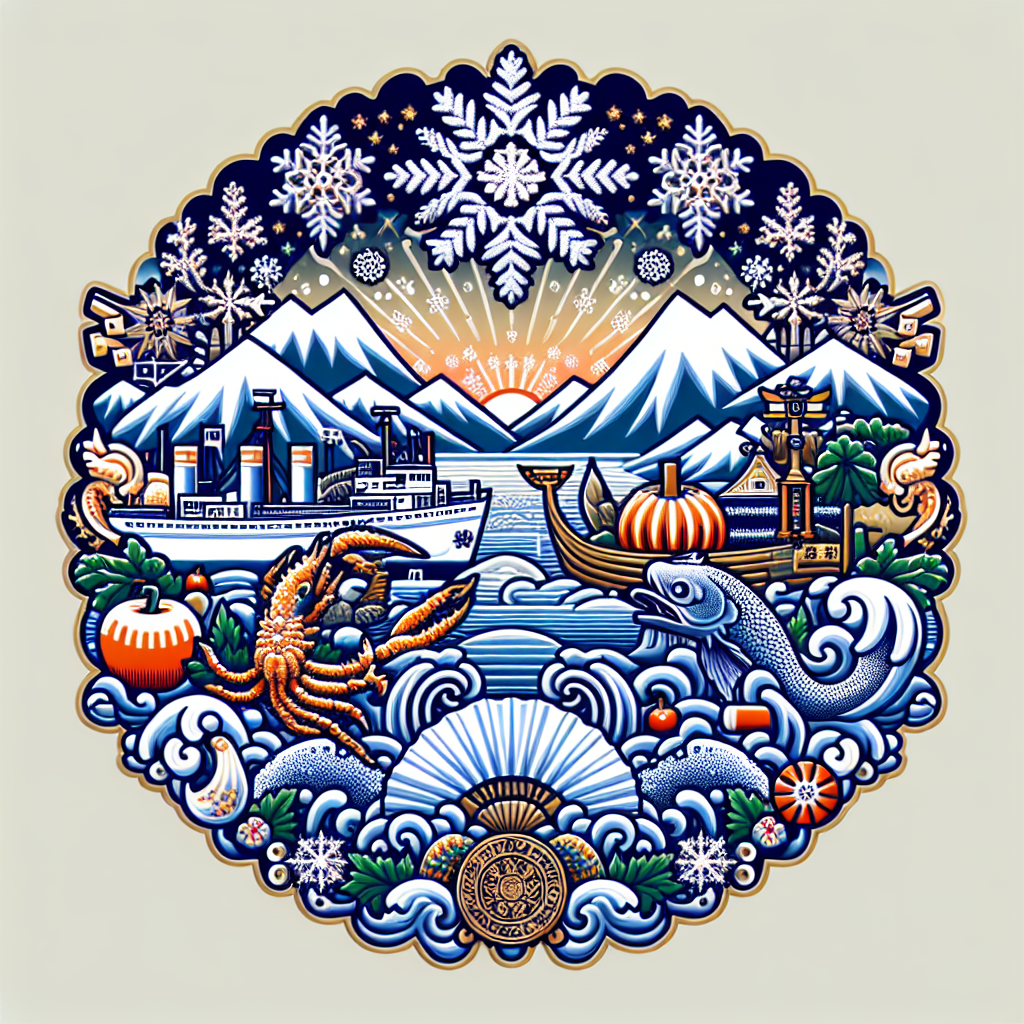e


In [ ]:
# result から実際のプロンプトを表示
print(result.data[0].revised_prompt)

In [ ]:
# png画像として保存：生成ＡＩに書かせてみる
# 現状、resultをb64_jsonで取得している


### Text to speech


- Document  
  https://platform.openai.com/docs/guides/text-to-speechn]https://platform.openai.com/docs/guides/text-to-speech3)
- API reference  
  [https://platform.openai.com/docs/api-reference/audio/createSpeech](https://platform.openai.com/docs/api-reference/audio/createSpeech)


**DALL·E 3** を使用します。


In [ ]:
from IPython.display import Audio
from openai import audio

speech_file_path = "speech.mp3"
with audio.speech.with_streaming_response.create(
  model="gpt-4o-mini-tts",
  voice="alloy",
  input="新潟大学院生会の栄光ある美しい紋章、雪華、海の幸。" # ここにプロンプトを入力
) as response:
  response.stream_to_file(speech_file_path)

Audio("speech.mp3")

***
# Pricing
[https://platform.openai.com/docs/pricing](https://platform.openai.com/docs/pricing)

***
# Limits
https://platform.openai.com/settings/organization/limits